# MI data

In [ ]:
import pandas as pd
import scanpy as sc
import plotnine as p9
import decoupler as dc

import liana as li

from mudata import MuData

In [ ]:
## 

# Tutorial code

In [4]:
import pandas as pd
import scanpy as sc
import plotnine as p9
import decoupler as dc

import liana as li

from mudata import MuData

In [5]:
adata = sc.read("kuppe_heart19.h5ad", backup_url='https://figshare.com/ndownloader/files/41501073?private_link=4744950f8768d5c8f68c')
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

100%|██████████| 44.4M/44.4M [00:09<00:00, 5.07MB/s]


In [6]:
adata.obs.head()

,in_tissue,array_row,array_col,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,mt_frac,celltype_niche,molecular_niche
AAACAAGTATCTCCCA-1,1,50,102,Visium_19_CK297,3125,8.047510,7194.0,8.881142,24.770642,31.387267,39.797053,54.503753,0.085630,ctniche_1,molniche_9
AAACAATCTACTAGCA-1,1,3,43,Visium_19_CK297,3656,8.204398,10674.0,9.275660,35.956530,42.167885,49.456624,61.045531,0.033275,ctniche_5,molniche_3
AAACACCAATAACTGC-1,1,59,19,Visium_19_CK297,3013,8.011023,7339.0,8.901094,33.247036,39.910069,47.227143,59.326884,0.029139,ctniche_5,molniche_3
AAACAGAGCGACTCCT-1,1,14,94,Visium_19_CK297,4774,8.471149,14235.0,9.563529,22.739726,29.884089,37.850369,51.099403,0.149194,ctniche_7,molniche_2
AAACAGCTTTCAGAAG-1,1,43,9,Visium_19_CK297,2734,7.913887,6920.0,8.842316,35.664740,42.268786,50.000000,62.384393,0.025601,ctniche_5,molniche_3


In [7]:
li.mt.bivar.show_functions()

,name,metadata,reference
0,pearson,weighted Pearson correlation coefficient,None
1,spearman,weighted Spearman correlation coefficient,None
2,cosine,weighted Cosine similarity,None
3,jaccard,weighted Jaccard similarity,None
4,morans,Moran's R,"Li, Z., Wang, T., Liu, P. and Huang, Y., 2022...."
5,masked_spearman,masked & weighted Spearman correlation,"Ghazanfar, S., Lin, Y., Su, X., Lin, D.M., Pat..."


In [8]:
li.ut.spatial_neighbors(adata, bandwidth=200, cutoff=0.1, kernel='gaussian', set_diag=True)

In [9]:
li.mt.lr_bivar(adata,
               function_name='jaccard', # Name of the function
               n_perms=100, # Number of permutations to calculate a p-value
               mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
               add_categories=True, # Whether to add local categories to the results
               expr_prop=0.2, # Minimum expr. proportion for ligands/receptors and their subunits
               use_raw=False,
               verbose=True
               )

Using resource `consensus`.
Using `.X`!


/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

In [18]:
lrdata = adata.obsm['local_scores']
lrdata.uns

{'spatial': {'Visium_19_CK297': {'images': {'hires': array([[[0.99607843, 0.99607843, 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            ...,
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1.        ]],
    
           [[0.99607843, 0.99607843, 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            ...,
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1.        ]],
    
           [[1.        , 1.        , 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            [0.99607843, 0.99607843, 0.99607843],
            ...,
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1.        ],
            [1.        , 1.        , 1

/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


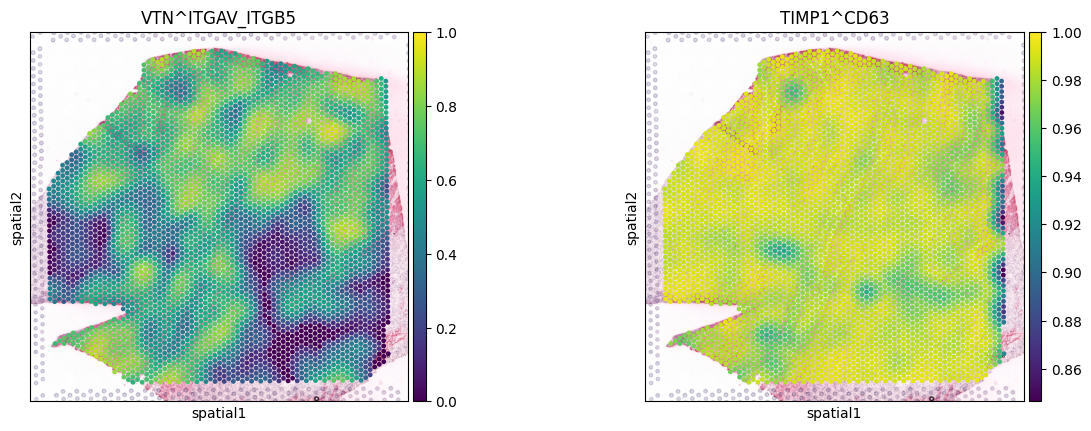

In [16]:
sc.pl.spatial(lrdata, color=['VTN^ITGAV_ITGB5', 'TIMP1^CD63'], size=1.4, vmax=1)